In [1]:
# %load ../jupyter_setup.txt
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

Following the tutorial [here](https://automating-gis-processes.github.io/CSC/notebooks/L2/geopandas-basics.html)

Vector data formats:  
    - [Shapefile](https://en.wikipedia.org/wiki/Shapefile)  
    - [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON)  
    - [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language)  
    - [GPKG](https://en.wikipedia.org/wiki/GeoPackage) 
    
Geopandas can read all those data formats (and many more).
    
Raster data formats:  
    - geotif  
    - netcdf  

In [2]:
import os
import pathlib
import geopandas as gpd

import shapely

In [3]:
sample_data = pathlib.Path.home() / "Data" / "GIS-Tutorial1" / "L2_data"
os.listdir(sample_data)

['Europe_borders.cpg',
 'Europe_borders.dbf',
 'Europe_borders.prj',
 'Europe_borders.sbn',
 'Europe_borders.sbx',
 'Europe_borders.shp',
 'Europe_borders.shx',
 'ne_110m_admin_0_countries',
 'NLS']

In [4]:
orig = gpd.read_file(sample_data / "Europe_borders.shp")

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.45778 54.56236, 8.44953 54.56269, ..."
1,Europe/Berlin,"POLYGON ((8.71992 47.69664, 8.72092 47.69530, ..."
2,Europe/Berlin,"POLYGON ((6.73317 53.57409, 6.73017 53.57542, ..."
3,Europe/Berlin,"POLYGON ((6.85822 53.59411, 6.85592 53.59550, ..."
4,Europe/Berlin,"POLYGON ((6.89894 53.62561, 6.88439 53.62814, ..."


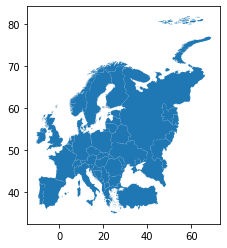

In [5]:
orig.plot()
orig.head()

In [6]:
orig.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,TZID,geometry
0,Europe/Berlin,"POLYGON ((4221214.558 3496203.404, 4220681.651..."
1,Europe/Berlin,"POLYGON ((4224860.478 2732279.320, 4224932.819..."
2,Europe/Berlin,"POLYGON ((4104652.176 3390034.953, 4104460.401..."
3,Europe/Berlin,"POLYGON ((4113025.664 3391895.756, 4112879.943..."
4,Europe/Berlin,"POLYGON ((4115871.228 3395282.099, 4114921.348..."


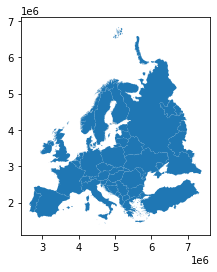

In [7]:
data = orig.to_crs(epsg=3035)
data.plot()
data.head()

In [8]:
data.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.17)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: European Terr

In [9]:
selection = data[:5]

# calculate areas
for index, row in selection.iterrows():
    poly_area = row['geometry'].area
    print(f"Polygon area at index {index} is {poly_area:.3f}")

Polygon area at index 0 is 2453433.968
Polygon area at index 1 is 7390887.389
Polygon area at index 2 is 31201021.098
Polygon area at index 3 is 747610.172
Polygon area at index 4 is 7890374.459


In [10]:
row["geometry"].area

7890374.458689375

In [11]:
data.area

0       2.453434e+06
1       7.390887e+06
2       3.120102e+07
3       7.476102e+05
4       7.890374e+06
            ...     
3627    4.866021e+05
3628    1.317378e+06
3629    4.279882e+07
3630    2.076046e+11
3631    5.712238e+06
Length: 3632, dtype: float64

In [12]:
data.geometry.to_crs("EPSG:4326")

0       POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1       POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2       POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3       POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4       POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
                              ...                        
3627    POLYGON ((18.75422 59.49353, 18.74311 59.49050...
3628    POLYGON ((18.84164 59.50605, 18.84028 59.50797...
3629    POLYGON ((18.59995 59.45653, 18.59431 59.45964...
3630    POLYGON ((30.00000 51.48947, 29.99511 51.48572...
3631    POLYGON ((-5.34392 36.11253, -5.34717 36.11528...
Name: geometry, Length: 3632, dtype: geometry

In [13]:

# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

# Create a Shapely polygon from the coordinate-tuple list
poly = shapely.geometry.Polygon(coordinates)

# Let's see what we have
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


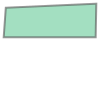

In [14]:
poly

In [15]:
poly.area

2.2847579999939037e-06

In [16]:
# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# Let's see what we have at the moment
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


In [17]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Add a new column and insert data (extra infomation)
newdata.loc[0, 'location'] = 'Senaatintori'

In [18]:
newdata

,geometry,location
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916...",Senaatintori


In [19]:
newdata.crs

In [20]:
data.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.17)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: European Terr

In [21]:
# import from epsg function from fiona module to add a 
# coordinate reference function to our geopandas dataframe
from fiona.crs import from_epsg

#set geopandas df coordinate system to WGS84
#newdata.crs = from_epsg(4326) # alternatively: newdata.crs = "epsg:4326"
newdata.crs = "epsg:4326"

print(newdata.crs)

epsg:4326


In [22]:
newdata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
from shapely.geometry import Point
import pycrs

# Create the point representing Helsinki (in WGS84)
hki_lon = 24.9417
hki_lat = 60.1666

# Create GeoDataFrame
helsinki = gpd.GeoDataFrame([[Point(hki_lon, hki_lat)]], geometry='geometry', crs='epsg:4326', columns=['geometry'])

# Print
print(helsinki)

                    geometry
0  POINT (24.94170 60.16660)


In [24]:
import pyproj

In [25]:
# Import pyproj
import pyproj

# Define the projection using the coordinates of our Helsinki point (hki_lat, hki_lon) as the center point
# The .srs here returns the Proj4-string presentation of the projection
aeqd = pyproj.Proj(proj='aeqd', ellps='WGS84', datum='WGS84', lat_0=hki_lat, lon_0=hki_lon).srs

# Reproject to aeqd projection using Proj4-string
helsinki = helsinki.to_crs(crs=aeqd)

# Print the data
print(helsinki)

# Print the crs
print('\nCRS:\n', helsinki.crs)

                  geometry
0  POINT (0.00000 0.00000)

CRS:
 +proj=aeqd +lat_0=60.1666 +lon_0=24.9417 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs


In [26]:

# Create a copy
europe_borders_aeqd = data.copy()

In [27]:
# Reproject to aeqd projection that we defined earlier
europe_borders_aeqd = europe_borders_aeqd.to_crs(crs=aeqd)

# Print
print(europe_borders_aeqd.head(2))

            TZID                                           geometry
0  Europe/Berlin  POLYGON ((-1057542.597 -493724.802, -1058052.5...
1  Europe/Berlin  POLYGON ((-1216418.435 -1243831.635, -1216378....


In [28]:
europe_borders_aeqd.crs

<Projected CRS: +proj=aeqd +lat_0=60.1666 +lon_0=24.9417 +x_0=0 +y ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Modified Azimuthal Equidistant
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

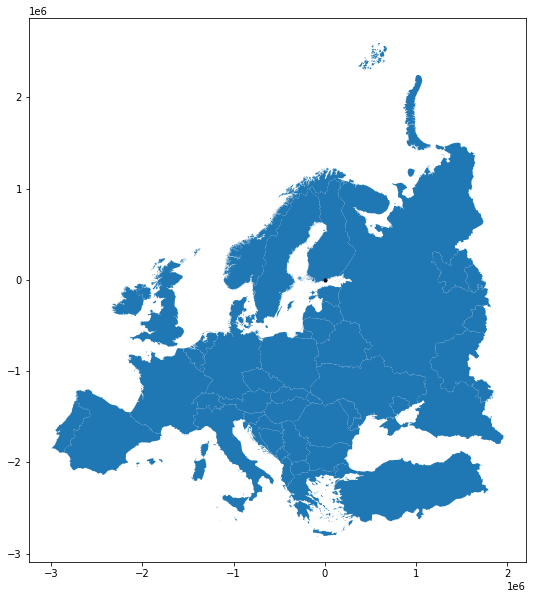

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

# Plot the country borders
europe_borders_aeqd.plot(ax=ax)

# Plot the Helsinki point on top of the borders using the same axis
helsinki.plot(ax=ax, color='black', markersize=10)